In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset=pd.read_excel('/OLA_trips_dataset.xlsx')
dataset.head()

,booking id,booking_date_time,gender,month,day_of_week,time_of_day,distance_travelled,time_taken,reason,toll,category,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings
0,1890061540,43249.919444,Male,May,Tue,0.919444,17,58.0,Office to/from Home,0,Mini,57.73,230.91,21.94,311.00,3
1,1542148932,43153.925000,Female,February,Thu,0.925000,18,43.0,Late Night Ride,0,Mini,52.04,208.16,19.76,279.96,5
2,1672692603,43194.882639,Female,April,Wed,0.882639,2,5.0,Office to/from Home,0,Prime,19.70,78.81,7.49,106.00,5
3,1925600201,43258.932639,Female,June,Thu,0.932639,15,49.0,Office to/from Home,35,Micro,51.24,239.96,21.22,312.00,5
4,1530845664,43150.479861,Male,February,Mon,0.479861,46,0.0,Office Event,0,Prime Rentals,195.92,783.68,74.45,1054.05,4


Defining dependent and indpendent variables

In [33]:
X=dataset.iloc[:,6].values
y=dataset.iloc[:,-2].values
X=X.reshape(X.size,1)
y=y.reshape(y.size,1)
print(X)
print(y)

[[17]
 [18]
 [ 2]
 ...
 [ 8]
 [10]
 [ 6]]
[[311.  ]
 [279.96]
 [106.  ]
 ...
 [182.  ]
 [232.91]
 [156.  ]]


Checking for missing data

In [34]:
dataset.iloc[:,6].isnull().values.any()

False

In [35]:
dataset.iloc[:,-2].isnull().values.any()

False

In [36]:
# imputing mean values instad of nan
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X)
# X=imputer.transform(X)

Checking data relationship

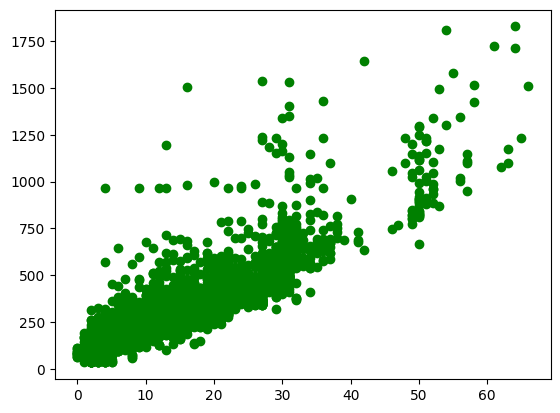

In [37]:
plt.scatter(X,y,color='green')

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

Implementing linear regression

In [39]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
y_predict=regressor.predict(X_test)

Text(0, 0.5, 'Fare')

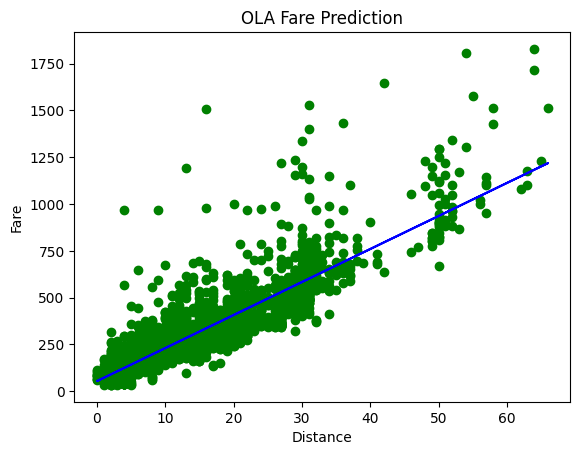

In [42]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title('OLA Fare Prediction')
plt.xlabel('Distance')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

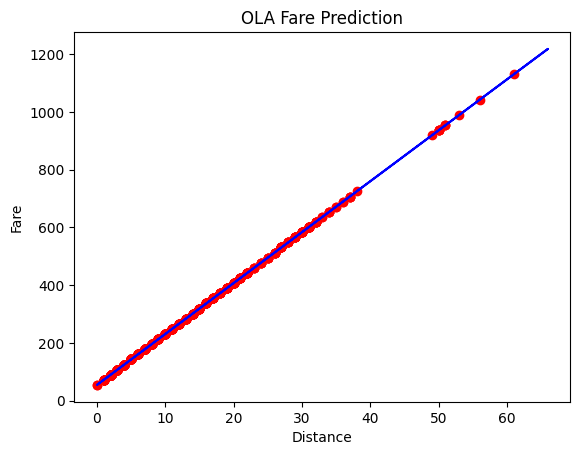

In [44]:
plt.scatter(X_test, y_predict, color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title('OLA Fare Prediction')
plt.xlabel('Distance')
plt.ylabel('Fare')